# All Modules Functionality Workbook

This notebook demonstrates all steps of the workflow: fetching, transforming, training, inference, and simulation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Check local directory is 05-deployment-and-automation
!pwd

/Users/whysocurious/Documents/MLDSAIProjects/stock-markets-analytics-zoomcamp/05-deployment-and-automation


In [8]:
# workflow settings
FETCH_REPO = True
TRANSFORM_DATA = True
TRAIN_MODEL = True

# 1) Fetching data from API / Loading from a local storage

In [4]:
from scripts.data_repo import DataRepository

repo = DataRepository()

In [9]:
if FETCH_REPO:
  # Fetch All 3 datasets for all dates from APIs
  repo.fetch()
  # save data to a local dir
  repo.persist(data_dir='local_data/')
else:
  # OR Load from disk
  repo.load(data_dir='local_data/')  

  
# DEBUG: Separate fetching of the datasets (YFinance-Tickers, YFinance-Indexes, FRED-Macro)
# repo.fetch_tickers()
# repo.fetch_indexes()
# repo.fetch_macro()

Fetching Tickers info from YFinance
Going download data for this tickers: ['MSFT', 'AAPL', 'GOOG']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Fetching Indexes info from YFinance


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching Macro info from FRED (Pandas_datareader)


In [6]:
# NOT WORKING YET - need to move all data transformations to Transform

# # Test fetching data with a specific min_date
# min_date = '2024-06-01'
# print(f"\nFetching data from {min_date}:")
# repo.fetch(min_date=min_date)

# repo.ticker_df.Ticker.nunique()

In [10]:
repo.ticker_df.Date.agg({'min','max','count'})

count        222307
max      2024-06-27
min      1972-06-01
Name: Date, dtype: object

In [11]:
repo.ticker_df.Ticker.nunique()

33

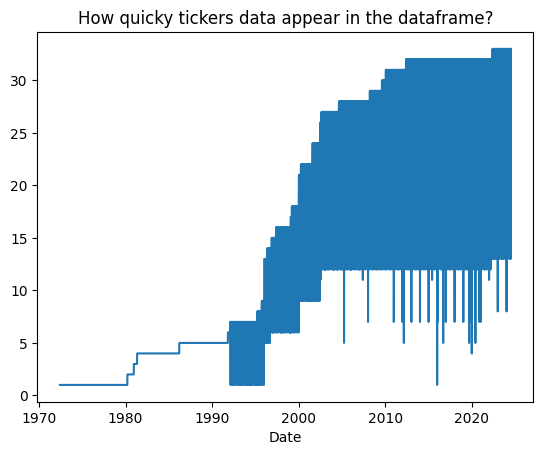

In [12]:
import matplotlib.pyplot as plt
repo.ticker_df.groupby('Date')['Open'].agg('count').plot()
plt.title('How quicky tickers data appear in the dataframe?')
plt.show()


In [13]:
repo.indexes_df.shape

(13742, 49)

In [14]:
repo.indexes_df.tail(1)

,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_365d,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-27,1.000907,1.006425,1.001761,1.045017,1.095354,1.376509,1.003047,0.993723,1.004334,0.971809,...,1.030861,1.054261,1.040494,1.01841,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
repo.macro_df.tail(1)

,DGS1,DGS5,Date,Quarter,gdppot_us_yoy,gdppot_us_qoq,Month,FEDFUNDS,cpi_core_yoy,cpi_core_mom,DGS10
DATE,,,,,,,,,,,
2024-06-26,5.13,4.32,2024-06-26,2024-04-01,0.022151,0.005343,2024-06-01,5.33,0.034111,0.001631,4.32


# 2) Transform all input fields (data_repo dfs) to one dataframe

In [16]:
from scripts.transform import TransformData

transformed =  TransformData(repo = repo)

if TRANSFORM_DATA:
  transformed.transform()
  transformed.persist(data_dir='local_data/')
else:
  transformed.load(data_dir='local_data/')

LT.NS: 100%|██████████| 33/33 [00:03<00:00, 10.08it/s]        


In [17]:
transformed.transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183840 entries, 3490 to 5461
Columns: 203 entries, Open to growth_btc_usd_365d
dtypes: datetime64[ns, UTC](1), datetime64[ns](2), float64(128), int32(65), int64(5), object(2)
memory usage: 240.5+ MB


In [18]:
transformed.transformed_df.tail(2)

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
5460,3601.000000,3624.899902,3592.25,3602.949951,3602.949951,2480187.0,INDIA,LT.NS,2024,6,...,1.031832,1.022673,1.028844,1.014519,0.983927,0.962496,0.93613,0.876312,0.859585,1.981587
5461,3597.449951,3601.300049,3550.00,3564.399902,3564.399902,5519875.0,INDIA,LT.NS,2024,6,...,1.030861,1.054261,1.040494,1.018410,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# last 3 days of the data
transformed.transformed_df.tail(3)['Date']

5459   2024-06-25 00:00:00+00:00
5460   2024-06-26 00:00:00+00:00
5461   2024-06-27 00:00:00+00:00
Name: Date, dtype: datetime64[ns, UTC]

# 3) Train the best model 
* Model : Random Forest(max_depth=17, n_estimators=200)

In [20]:
from scripts.train import TrainModel
import warnings

# Suppress all warnings (not recommended in production unless necessary)
warnings.filterwarnings("ignore")

trained = TrainModel(transformed=transformed)

if TRAIN_MODEL:
  trained.prepare_dataframe() # prepare dataframes
  trained.train_random_forest() # train the model
  trained.persist(data_dir='local_data/') # save the model to disk
else:
  trained.prepare_dataframe() # prepare dataframes (incl. for inference)
  trained.load(data_dir='local_data/')


Prepare the dataframe: define feature sets, add dummies, temporal split
length: X_train (124263, 240),  X_validation (29536, 240), X_test (30041, 240)
  X_train_valid = (153799, 240),  all combined: X_all (183840, 240)
Training the best model (RandomForest (max_depth=17, n_estimators=200))


In [21]:
# resulting df
trained.df_full.tail(2)

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,Ticker_SAP,Ticker_SBIN.NS,Ticker_SIE.DE,Ticker_TCS.NS,Ticker_TTE,Ticker_V,ticker_type_EU,ticker_type_INDIA,ticker_type_US,split
5460,3601.000000,3624.899902,3592.25,3602.949951,3602.949951,2480187.0,INDIA,LT.NS,2024,6,...,0,0,0,0,0,0,0,1,0,test
5461,3597.449951,3601.300049,3550.00,3564.399902,3564.399902,5519875.0,INDIA,LT.NS,2024,6,...,0,0,0,0,0,0,0,1,0,test


In [22]:
trained.model

RandomForestClassifier(max_depth=17, n_estimators=200, n_jobs=-1,
                       random_state=42)

# 4) Inference

In [23]:
prediction_name='pred_rf_best'
trained.make_inference(pred_name=prediction_name)

Making inference


In [24]:
trained.df_full

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month_x,...,Ticker_SIE.DE,Ticker_TCS.NS,Ticker_TTE,Ticker_V,ticker_type_EU,ticker_type_INDIA,ticker_type_US,split,pred_rf_best,pred_rf_best_rank
3490,58.687500,59.312500,56.00000,58.281250,36.000641,53228400.0,US,MSFT,2000,1,...,0,0,0,0,0,0,1,train,0.321739,13.0
3491,56.781250,58.562500,56.12500,56.312500,34.784527,54119000.0,US,MSFT,2000,1,...,0,0,0,0,0,0,1,train,0.320425,17.0
3492,55.562500,58.187500,54.68750,56.906250,35.151291,64059600.0,US,MSFT,2000,1,...,0,0,0,0,0,0,1,train,0.356236,19.0
3493,56.093750,56.937500,54.18750,55.000000,33.973793,54976600.0,US,MSFT,2000,1,...,0,0,0,0,0,0,1,train,0.397194,19.0
3494,54.312500,56.125000,53.65625,55.718750,34.417767,62013600.0,US,MSFT,2000,1,...,0,0,0,0,0,0,1,train,0.700656,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,3604.050049,3610.000000,3516.00000,3535.000000,3535.000000,4508508.0,INDIA,LT.NS,2024,6,...,0,0,0,0,0,1,0,test,0.498607,13.0
5458,3520.350098,3567.000000,3505.00000,3531.600098,3531.600098,2330559.0,INDIA,LT.NS,2024,6,...,0,0,0,0,0,1,0,test,0.492869,16.0
5459,3556.500000,3591.949951,3528.00000,3587.800049,3587.800049,2158039.0,INDIA,LT.NS,2024,6,...,0,0,0,0,0,1,0,test,0.460697,27.0
5460,3601.000000,3624.899902,3592.25000,3602.949951,3602.949951,2480187.0,INDIA,LT.NS,2024,6,...,0,0,0,0,0,1,0,test,0.466094,31.0


In [25]:
COLUMNS = ['Adj Close','Ticker','Date',prediction_name, prediction_name+'_rank']
trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS]

,Adj Close,Ticker,Date,pred_rf_best,pred_rf_best_rank
8355,675.500000,CDI.PA,2024-06-14 00:00:00+00:00,0.543479,1.0
8220,65.701996,TTE,2024-06-17 00:00:00+00:00,0.547893,1.0
8221,66.660004,TTE,2024-06-18 00:00:00+00:00,0.513400,1.0
6288,436.649994,OR.PA,2024-06-19 00:00:00+00:00,0.535327,1.0
5453,1381.150024,BHARTIARTL.NS,2024-06-20 00:00:00+00:00,0.530956,1.0
517,1023.950012,LICI.NS,2024-06-21 00:00:00+00:00,0.540728,1.0
518,1015.450012,LICI.NS,2024-06-24 00:00:00+00:00,0.553473,1.0
8362,696.000000,CDI.PA,2024-06-25 00:00:00+00:00,0.520474,1.0
520,1001.400024,LICI.NS,2024-06-26 00:00:00+00:00,0.582255,1.0
6294,422.850006,OR.PA,2024-06-27 00:00:00+00:00,0.574035,1.0


In [26]:
trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS]

,Adj Close,Ticker,Date,pred_rf_best,pred_rf_best_rank
8355,675.500000,CDI.PA,2024-06-14 00:00:00+00:00,0.543479,1.0
8220,65.701996,TTE,2024-06-17 00:00:00+00:00,0.547893,1.0
8221,66.660004,TTE,2024-06-18 00:00:00+00:00,0.513400,1.0
6288,436.649994,OR.PA,2024-06-19 00:00:00+00:00,0.535327,1.0
5453,1381.150024,BHARTIARTL.NS,2024-06-20 00:00:00+00:00,0.530956,1.0
517,1023.950012,LICI.NS,2024-06-21 00:00:00+00:00,0.540728,1.0
518,1015.450012,LICI.NS,2024-06-24 00:00:00+00:00,0.553473,1.0
8362,696.000000,CDI.PA,2024-06-25 00:00:00+00:00,0.520474,1.0
520,1001.400024,LICI.NS,2024-06-26 00:00:00+00:00,0.582255,1.0
6294,422.850006,OR.PA,2024-06-27 00:00:00+00:00,0.574035,1.0
